# 1.데이터불러오기

# 개선해야할 점
    1) title+content 형태소 분석 & word2vec
    2) [사진,포토] 등 불필요한 단어 제거
    3) 불용어처리 가능하게 하기 

In [2]:
import re
import pandas as pd
import numpy as np
import json
#from bs4 import Beautiful Soup
# from nltk.corpus import Beautiful Soup
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
import konlp
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#헤더추가 (title,content,time)
train =pd.read_csv('dataset3000.csv',names=['title','content','time','nan'])
train.head()
train.shape
train.dtypes

title       object
content     object
time        object
nan        float64
dtype: object

In [3]:
train.head()

title  \
0                 '[사진]조여정,'우아한 플라워원피스 입고''   
1              '[프로필]국세청 과장급 전보자(7월 22일 자)'   
2           '[조이HD]춘사영화제 참석한 봉준호 감독-한진원 작가'   
3                 '[사진]클라라,'시선 올킬 블루 롱드레스''   
4  '[사진]7개부문 노미네이트 기생충 봉준호 감독,'엄청난 환호 받으며''   

                                             content              time  nan  
0  '제24회 춘사영화제는 ‘아시아를 대표하는 영화제로의 도약’을 표방한 제23회에 이...  2019-07-20 16:40  NaN  
1  '조사기획1계장 ▲경주세무서장 ▲국세청 인도네시아 주재관 ▲외교부 파견 ▲서울지방국...  2019-07-20 16:40  NaN  
2  '말레이시아 Finas(말레시아 영화진흥위)의 신임 대표인 Ahmad Idham을 ...  2019-07-20 16:40  NaN  
3  '제24회 춘사영화제는 ‘아시아를 대표하는 영화제로의 도약’을 표방한 제23회에 이...  2019-07-20 16:40  NaN  
4  '제24회 춘사영화제는 ‘아시아를 대표하는 영화제로의 도약’을 표방한 제23회에 이...  2019-07-20 16:40  NaN

In [4]:
# nan 변수버리기
train.drop(['nan'], axis='columns', inplace=True)

In [5]:
train.tail()

title  \
2868  '[포토] ABCC FINTECH INDONESIA, 양해각서(MOU) 체결'   
2869                        '옥천 복숭아, 홍콩 시장 공략 나서'   
2870    '‘애인과 혼전 성관계’ 때문에 어느 20대 여성이 받은 무시무시한 처벌'   
2871         '부산대병원 개발 '의료영상저장전송시스템', 카자흐스탄서 맹활약'   
2872          'aT 인도네시아서 K-Food 2,235만불 수출상담등 쾌거'   

                                                content              time  
2868  '시사매거진, SISAMAGAZINE 8월 1일 오후 4시(현지시간) 인도네시아 자...  2019-08-01 20:00  
2869  '한편, 옥천군복숭아수출협의회는 2017년 인도네시아에 0.7t(4천522달러), ...  2019-08-01 20:00  
2870  '혼전 성관계를 가진 인도네시아 남녀가 공개 태형을 당했다고 서울신문 나우뉴스가 1...  2019-08-01 20:00  
2871  '세계 시장에서 경쟁할 수 있는 수준의 '엔터프라이즈 데이터 플랫폼' 개발을 위해 ...  2019-08-01 20:00  
2872  '인도네시아에서 '2019 자카르타 K-Food Fair' 행사를 개최해 총 2천2...  2019-08-01 20:00

In [6]:
train.shape

(2873, 3)

# 2.데이터전처리

In [7]:
 # 데이터개수
 print('학습 데이터의 개수: {}'.format(len(train)))

학습 데이터의 개수: 2873


In [8]:
# title(제목) 컬럼 문자길이
train_title_len=train['title'].apply(len)
train_title_len.head()

0    25
1    28
2    31
3    25
4    40
Name: title, dtype: int64

In [9]:
# content(내용) 컬럼 문자길이
train_content_len=train['content'].apply(len)
train_content_len.head()

0    127
1    115
2    129
3    127
4    127
Name: content, dtype: int64

Text(0, 0.5, 'Number of review')

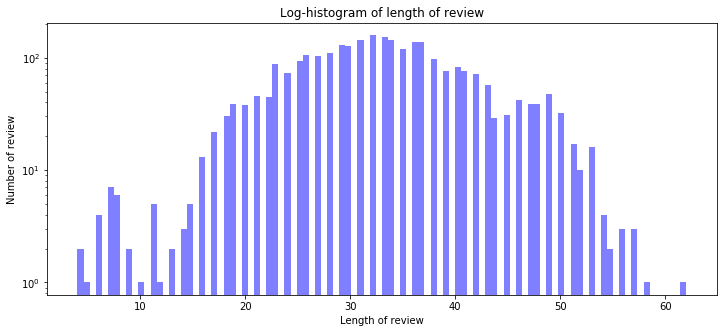

In [10]:
# title 문자길이 분포

#그래프에 대한 이미지 크기 선언
#figsize : (가로,세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
#히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color :그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_title_len, bins=100, alpha=0.5, color='b',label='word')
plt.yscale('log',nonposy='clip')
#그래프 제목
plt.title('Log-histogram of length of review')
#그래프 x축 라벨
plt.xlabel('Length of review')
#그래프 y축 라벨
plt.ylabel('Number of review')

In [11]:
# title 길이 통계값
print('제목 길이 최댓값: {}'.format(np.max(train_title_len)))
print('제목 길이 최솟값: {}'.format(np.min(train_title_len)))
print('제목 길이 평균값: {:.2f}'.format(np.mean(train_title_len)))
print('제목 길이 표준편차: {:.2f}'.format(np.std(train_title_len)))
print('제목 길이 중간값 {}'.format(np.median(train_title_len)))
print('제목 길이 제1사분위: {}'.format(np.percentile(train_title_len,25)))
print('제목 길이 제3사분위: {}'.format(np.percentile(train_title_len,75)))     
    
                    

제목 길이 최댓값: 62
제목 길이 최솟값: 4
제목 길이 평균값: 32.98
제목 길이 표준편차: 8.47
제목 길이 중간값 33.0
제목 길이 제1사분위: 27.0
제목 길이 제3사분위: 38.0


Text(0, 0.5, 'Number of review')

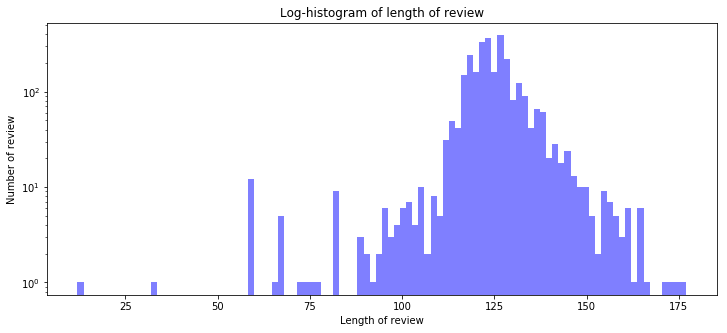

In [12]:
# content 문자길이 분포
# title 문자길이 분포

#그래프에 대한 이미지 크기 선언
#figsize : (가로,세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
#히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color :그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_content_len, bins=100, alpha=0.5, color='b',label='word')
plt.yscale('log',nonposy='clip')
#그래프 제목
plt.title('Log-histogram of length of review')
#그래프 x축 라벨
plt.xlabel('Length of review')
#그래프 y축 라벨
plt.ylabel('Number of review')

In [13]:
# content 길이 통계값
print('내용 길이 최댓값: {}'.format(np.max(train_content_len)))
print('내용 길이 최솟값: {}'.format(np.min(train_content_len)))
print('내용 길이 평균값: {:.2f}'.format(np.mean(train_content_len)))
print('내용 길이 표준편차: {:.2f}'.format(np.std(train_content_len)))
print('내용 길이 중간값 {}'.format(np.median(train_content_len)))
print('내용 길이 제1사분위: {}'.format(np.percentile(train_content_len,25)))
print('내용 길이 제3사분위: {}'.format(np.percentile(train_content_len,75)))     
    

내용 길이 최댓값: 177
내용 길이 최솟값: 12
내용 길이 평균값: 124.67
내용 길이 표준편차: 10.98
내용 길이 중간값 124.0
내용 길이 제1사분위: 120.0
내용 길이 제3사분위: 129.0


(-0.5, 799.5, 599.5, -0.5)

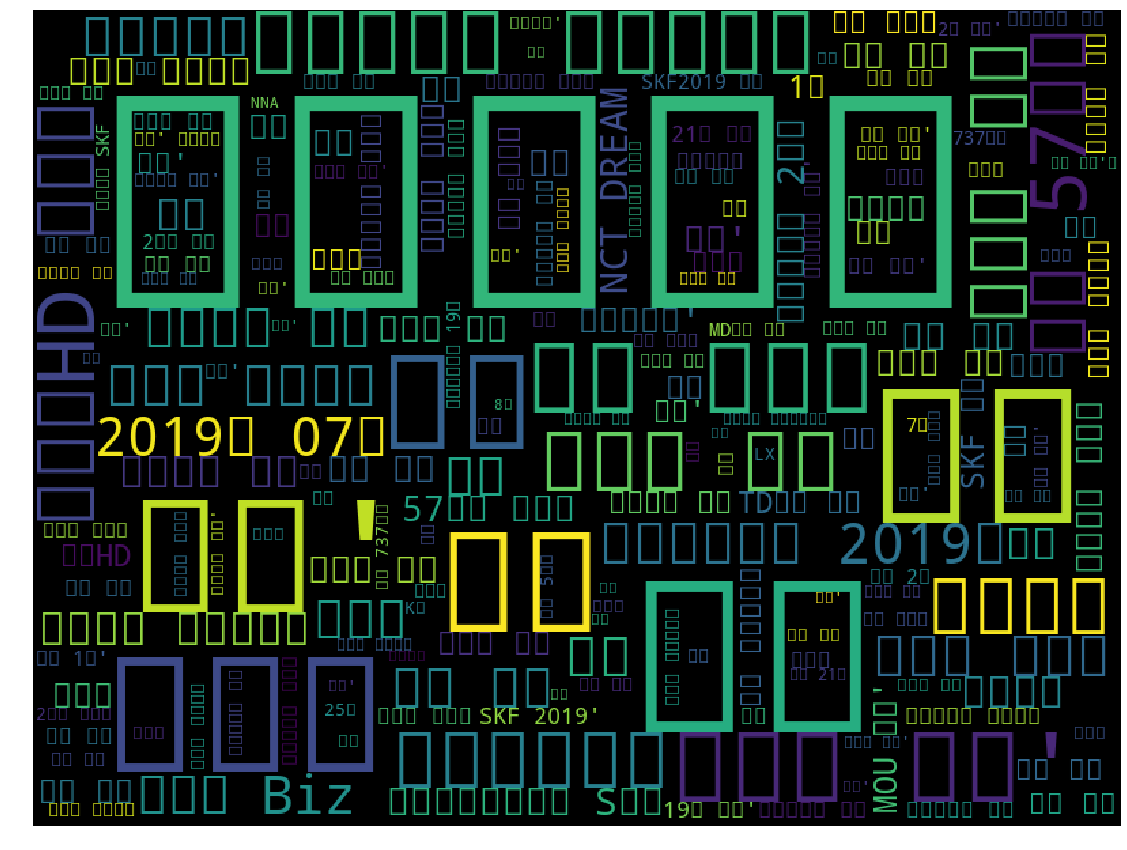

In [14]:
#wordcloud
# title(제목) 많이 사용된 단어
from wordcloud import WordCloud
cloud=WordCloud(width=800,height=600).generate(" ".join(train['title']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

In [15]:
#wordcloud
wordcloud=WordColud(font_path=C:\Users\glass\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf,+'nanumgothic-regular.ttf').generate(" ".join(train['title']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

SyntaxError: invalid syntax (<ipython-input-15-a5f50b37ebd8>, line 2)

# 3.데이터정제
###  여기서는 'title'로 했다.

# konlpy 사용하기! #다운 필요jype

# [사진], [포토] 지우기!

In [18]:
train.head()

title  \
0                 '[사진]조여정,'우아한 플라워원피스 입고''   
1              '[프로필]국세청 과장급 전보자(7월 22일 자)'   
2           '[조이HD]춘사영화제 참석한 봉준호 감독-한진원 작가'   
3                 '[사진]클라라,'시선 올킬 블루 롱드레스''   
4  '[사진]7개부문 노미네이트 기생충 봉준호 감독,'엄청난 환호 받으며''   

                                             content              time  
0  '제24회 춘사영화제는 ‘아시아를 대표하는 영화제로의 도약’을 표방한 제23회에 이...  2019-07-20 16:40  
1  '조사기획1계장 ▲경주세무서장 ▲국세청 인도네시아 주재관 ▲외교부 파견 ▲서울지방국...  2019-07-20 16:40  
2  '말레이시아 Finas(말레시아 영화진흥위)의 신임 대표인 Ahmad Idham을 ...  2019-07-20 16:40  
3  '제24회 춘사영화제는 ‘아시아를 대표하는 영화제로의 도약’을 표방한 제23회에 이...  2019-07-20 16:40  
4  '제24회 춘사영화제는 ‘아시아를 대표하는 영화제로의 도약’을 표방한 제23회에 이...  2019-07-20 16:40

In [21]:
title=list(train['title'])

In [17]:
from konlpy.tag import Okt

In [16]:
train.dtypes

title      object
content    object
time       object
dtype: object

In [ ]:
train1=train

In [ ]:
# 여기서 train을 str로 선언하면 나중에 for문을 쓰지 못한다.

In [24]:
#전체제목
# 리스트전체가 아니라 하나씩 빼서 처리해야하기 때문에 for문으로 처리.
#1.한글 및 공백을 제외한 문자를 모두 제거
for i in range(len(title)) :
    title[i] = re.sub("[^가-힣ㄱ-ㅎ ㅏ-ㅣ\\s]","", title[i])

print(title)

['사진조여정우아한 플라워원피스 입고', '프로필국세청 과장급 전보자월 일 자', '조이춘사영화제 참석한 봉준호 감독한진원 작가', '사진클라라시선 올킬 블루 롱드레스', '사진개부문 노미네이트 기생충 봉준호 감독엄청난 환호 받으며', '사진함소원우아한 입장', '조이엄태구 지적인 남자야', '조이진기주 매력적인 미모', '조이기생충 이정은 엄마 미소', '조이공명 춘사영화제 빛내는 미소', '조이춘사영화제 조여정 칸이 반한 미소', '조이춘사영화제 문지인 민트여신', '사진공명훈남 매력', '무역위 전기프라이팬 특허권 침해 불공정무역행위 조사 개시', '사진베이비페이스 이성경화려한 변신', '사진클라라섹시하게', '사진상체 노출 클라라이보다 더 아찔할 수 없어', '조이조여정 춘사영화제 여우주연상에 빛나는 자태', '조이함소원 연하 남편을 향한 마음', '사진춘사영화제 참석한 기생충 봉준호 감독', '사진이정은영화 팬 여러분 사랑해요', '사진문지인섹시 레드립', '사진하지영어느덧 여배우', '사진김강현춘사영화제 왔어요', '사진공명달콤한 하트', '조이전여빈 우아한 블랙 드레스', '조이전여빈 춘사영화제가 주목하는 신예', '사진공명젠틀하게', '조이문지인 년차 베테랑 여배우', '사진전여빈아름다운 미소', '조이춘사영화제 이성경 금빛 몸매', '조이클라라 보기만 해도 시원한 블루 드레스', '사진정애연단아한 매력', '사진정애연춘사영화제 레드카펫 밟으며', '사진주지훈그 만의 시그널', '사진주지훈럭셔리하게', '사진주지훈오늘도 멋짐 폭발', '사진기생충 박명훈춘사영화제 수상 기대해요', '사진한진원 작가봉준호 감독기생충 초대 받았어요', '사진골드 드레스 이성경귀걸이도 금빛 하트', '사진레드카펫 런웨이 이성경모델은 달라도 달라', '사진이성경금빛 각선미', '사진조여정미모 여전해', '사진조여정아기 같은 미소', '사진조여정미소 여신', '사진꽃보다 더 빛나는 조여정의 미모', '사진미소가 아름다운 조여정', '중기 해외진출 지원 발벗고 나선 부산경진

In [29]:
#전체 형태소나누기
#불용어 제거하기 위해 문장 단어 나누기
okt=Okt() 
title_text=[ ] # or title_text=[''] * len(title)
for i in range(len(title)) :
    title_text.append(okt.morphs(title[i],stem=True))

print(title_text)

[['사진', '조여정', '우아하다', '플라워', '원피스', '입다'], ['프로필', '국세청', '과장', '급', '전보', '자월', '일', '자'], ['조', '이춘사', '영화제', '참석', '한', '봉준호', '감독', '한', '진원', '작가'], ['사진', '클라라', '시선', '올킬', '블루', '롱', '드레스'], ['사진', '개', '부문', '노미네이트', '기생충', '봉준호', '감독', '엄청나다', '환호', '받다'], ['사진', '함소원', '우아하다', '입장'], ['조이', '엄태구', '지적', '인', '남자', '야'], ['조이진', '기주', '매력', '적', '인', '미모'], ['조이', '기생충', '이정은', '엄마', '미소'], ['조이', '공명', '추다', '영화제', '빛', '내다', '미소'], ['조', '이춘사', '영화제', '조여정', '칸', '이', '반한', '미소'], ['조', '이춘사', '영화제', '문지', '인', '민트', '여신'], ['사진', '공명', '훈남', '매력'], ['무역', '위', '전기', '프라이팬', '특허권', '침해', '불공정', '무역', '행위', '조사', '개시'], ['사진', '베이비페이스', '이성경', '화려하다', '변신'], ['사진', '클라라', '섹시하다'], ['사진', '상체', '노출', '클라라', '이', '보다', '더', '아찔하다', '수', '없다'], ['조이조', '여정', '추다', '영화제', '여우주연상', '에', '빛나다', '자태'], ['조이', '함소원', '연하', '남편', '을', '향', '한', '마음'], ['사진', '추다', '영화제', '참석', '한', '기생충', '봉준호', '감독'], ['사진', '이정은', '영화', '팬', '여러분', '사랑', '하다'], ['사진', '문', '지인', '섹시', '레드', '립'], 

# 여기서 csv파일 만들기

In [31]:
# 불용어제거
stop_words=set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
clean_title=[token for w in title_text if not token in stop_words]

NameError: name 'token' is not defined

## 전처리과정 전체 적용 함수 

In [ ]:
def preprocessing(train,okt,remove_stopwords=False,stop_words=[]):
    #train: 전처리할 텍스트
    #okt:okt 객체를 반복적으로 생성하지 않고 미리 생성한 후 인자로 받는다.
    #remove_stopword:불용어를 제거할지 여부 선택, 기본값은 False
    #stop_word:불용어 사전은 사용자가 직접입력해야함. 기본값은 빈 리스트
    
    #1.한글 및 공백을 제외한 문자를 모두 제거
    title_text=re.sub("[^가-힣ㄱ-ㅎ ㅏ-ㅣ\\s]","",str(train['title']))
    
    #2. okt객체를 활용해 형태소 단위로 나눈다.
    title_text=okt.morphs(str(title_text),stem=True)
    
    if remove_stopwords:
        #불용어 제거(선택적)
        title_text=[token for token in title_text if not token in stop_words]
    
    return title_text

In [ ]:
print(title_text)def preprocessing(train,okt,remove_stopwords=False,stop_words=[]):
    #train: 전처리할 텍스트
    #okt:okt 객체를 반복적으로 생성하지 않고 미리 생성한 후 인자로 받는다.
    #remove_stopword:불용어를 제거할지 여부 선택, 기본값은 False
    #stop_word:불용어 사전은 사용자가 직접입력해야함. 기본값은 빈 리스트
    
    #1.한글 및 공백을 제외한 문자를 모두 제거
    title_text=re.sub("[^가-힣ㄱ-ㅎ ㅏ-ㅣ\\s]","",str(train['title']))
    
    #2. okt객체를 활용해 형태소 단위로 나눈다.
    title_text=okt.morphs(str(title_text),stem=True)
    
    if remove_stopwords:
        #불용어 제거(선택적)
        title_text=[token for token in title_text if not token in stop_words]
    
    return title_text

In [ ]:
# 함수실행

# 불용어정의
stop_words=['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한','및','듯','료']

okt=Okt()

clean_train_title=[]

## 여기서 train 무엇인지... 다시 보기 p.224
for train in train['title']:
    #비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(train) == str:
        clean_train_title.append(preprocessing(train,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        clean_train_title.append([]) # string이 아니면 비어있는 값 추가
        
clean_train_title[:4] #앞의 4개 데이터확인
    

# train1

In [ ]:
train.head()

In [ ]:
# train1

# 함수실행
# 불용어정의
stop_words=['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한','및','듯','료']

okt=Okt()

clean_train_title=[]

## 여기서 train 무엇인지... 다시 보기 p.224
for train1 in train1['title']:
    #비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(train) == str:
        clean_train_title.append(preprocessing(train1,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        clean_train_title.append([]) # string이 아니면 비어있는 값 추가
        
clean_train_title[:4] #앞의 4개 데이터확인
    

In [ ]:
# content 전체전처리 #return word_

In [ ]:
# 단어최대길이설정

In [ ]:
# 벡터표상화

# 4.word2vec 벡터화

In [ ]:
#word2vec 파라미터 설명
# workers =프로세스개수
# size= 워드 벡터 특징값수(벡터의 차원을 정한다.)
# min_count =단어에 대한 최소 빈도수(적은 빈도수의 단어는 학습하지 않는다. )
# window =컨테스트 윈도우 크기
# sample=샘플링 비율 (Ex)1e-3 :0.001이 좋은 성능을 낸다

num_workers=4
num_size=300
min_word_count=40
context=10
downsampling=1e-3

In [33]:
#진행상황확인위해
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)



In [48]:
from gensim.models import Word2Vec
print("Training model...")
model= Word2Vec(title_text, size=300, window=5, min_count=5, workers=4, sg=1)



2019-11-21 21:34:38,430 : INFO : collecting all words and their counts
2019-11-21 21:34:38,432 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-11-21 21:34:38,446 : INFO : collected 4854 word types from a corpus of 26671 raw words and 2873 sentences
2019-11-21 21:34:38,447 : INFO : Loading a fresh vocabulary
2019-11-21 21:34:38,452 : INFO : effective_min_count=5 retains 1193 unique words (24% of original 4854, drops 3661)
2019-11-21 21:34:38,454 : INFO : effective_min_count=5 leaves 20576 word corpus (77% of original 26671, drops 6095)
2019-11-21 21:34:38,460 : INFO : deleting the raw counts dictionary of 4854 items
2019-11-21 21:34:38,461 : INFO : sample=0.001 downsamples 59 most-common words
2019-11-21 21:34:38,462 : INFO : downsampling leaves estimated 18138 word corpus (88.2% of prior 20576)
2019-11-21 21:34:38,465 : INFO : estimated required memory for 1193 words and 300 dimensions: 3459700 bytes
2019-11-21 21:34:38,466 : INFO : resetting layer weigh

Training model...


2019-11-21 21:34:38,611 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-21 21:34:38,684 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-21 21:34:38,692 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-21 21:34:38,704 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-21 21:34:38,705 : INFO : EPOCH - 2 : training on 26671 raw words (18141 effective words) took 0.1s, 176786 effective words/s
2019-11-21 21:34:38,720 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-11-21 21:34:38,769 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-11-21 21:34:38,777 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-11-21 21:34:38,790 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-11-21 21:34:38,791 : INFO : EPOCH - 3 : training on 26671 raw words (18182 effective words) took 0.1s, 235443 effective words/s
2019-1

In [49]:
model.most_similar("감", topn=10)

C:\Users\glass\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-11-21 21:34:42,678 : INFO : precomputing L2-norms of word weight vectors


[('라인', 0.9998027682304382),
 ('배', 0.9998000860214233),
 ('것', 0.9997971057891846),
 ('이끌다', 0.9997963905334473),
 ('지', 0.9997942447662354),
 ('올', 0.9997937083244324),
 ('출시', 0.9997913241386414),
 ('방문', 0.999790370464325),
 ('밉다', 0.9997869729995728),
 ('쓰레기', 0.9997861385345459)]

In [51]:
model.most_similar("사전", topn=10)

C:\Users\glass\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word '사전' not in vocabulary"

In [52]:
model.most_similar("설립", topn=10)

C:\Users\glass\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('인터넷', 0.9997996091842651),
 ('출시', 0.9997992515563965),
 ('혁신', 0.9997982978820801),
 ('통해', 0.9997960925102234),
 ('라인', 0.9997913837432861),
 ('규제', 0.9997903108596802),
 ('부산', 0.9997901320457458),
 ('잡다', 0.9997876882553101),
 ('크다', 0.9997875094413757),
 ('호텔', 0.9997848868370056)]

In [53]:
model.most_similar("사진", topn=10)

C:\Users\glass\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('시작', 0.9997491836547852),
 ('않다', 0.999739944934845),
 ('손', 0.9997342228889465),
 ('밉다', 0.9997270107269287),
 ('물', 0.9997246861457825),
 ('몸매', 0.9997203350067139),
 ('상', 0.9997143149375916),
 ('출시', 0.9997142553329468),
 ('매력', 0.999712347984314),
 ('나', 0.999710202217102)]

['사진조여정우아한 플라워원피스 입고',
 '프로필국세청 과장급 전보자월 일 자',
 '조이춘사영화제 참석한 봉준호 감독한진원 작가',
 '사진클라라시선 올킬 블루 롱드레스',
 '사진개부문 노미네이트 기생충 봉준호 감독엄청난 환호 받으며',
 '사진함소원우아한 입장',
 '조이엄태구 지적인 남자야',
 '조이진기주 매력적인 미모',
 '조이기생충 이정은 엄마 미소',
 '조이공명 춘사영화제 빛내는 미소',
 '조이춘사영화제 조여정 칸이 반한 미소',
 '조이춘사영화제 문지인 민트여신',
 '사진공명훈남 매력',
 '무역위 전기프라이팬 특허권 침해 불공정무역행위 조사 개시',
 '사진베이비페이스 이성경화려한 변신',
 '사진클라라섹시하게',
 '사진상체 노출 클라라이보다 더 아찔할 수 없어',
 '조이조여정 춘사영화제 여우주연상에 빛나는 자태',
 '조이함소원 연하 남편을 향한 마음',
 '사진춘사영화제 참석한 기생충 봉준호 감독',
 '사진이정은영화 팬 여러분 사랑해요',
 '사진문지인섹시 레드립',
 '사진하지영어느덧 여배우',
 '사진김강현춘사영화제 왔어요',
 '사진공명달콤한 하트',
 '조이전여빈 우아한 블랙 드레스',
 '조이전여빈 춘사영화제가 주목하는 신예',
 '사진공명젠틀하게',
 '조이문지인 년차 베테랑 여배우',
 '사진전여빈아름다운 미소',
 '조이춘사영화제 이성경 금빛 몸매',
 '조이클라라 보기만 해도 시원한 블루 드레스',
 '사진정애연단아한 매력',
 '사진정애연춘사영화제 레드카펫 밟으며',
 '사진주지훈그 만의 시그널',
 '사진주지훈럭셔리하게',
 '사진주지훈오늘도 멋짐 폭발',
 '사진기생충 박명훈춘사영화제 수상 기대해요',
 '사진한진원 작가봉준호 감독기생충 초대 받았어요',
 '사진골드 드레스 이성경귀걸이도 금빛 하트',
 '사진레드카펫 런웨이 이성경모델은 달라도 달라',
 '사진이성경금빛 각선미',
 '사진조여정미모 여전해',
 '사진조여정아기 같은 미소',
 '사진조여정미소 여신',
 '사진꽃보다 더 빛나는 조여정의 미

In [ ]:
#위에 껄로 학습완료

#모델 하이퍼파라미터를 설정한 내용을 모델 이름에 담는 다면 나중에 참고하기에 좋을 것이다.
#모델을 저장하면 Word2Vec.load()를 통해 모델을 다시 사용할 수 있다. 
#model_name="300features_40minwords_10context"
############ model.save(model_name)

# 5. 텍스트 유사도